In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('loan_data.csv')
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

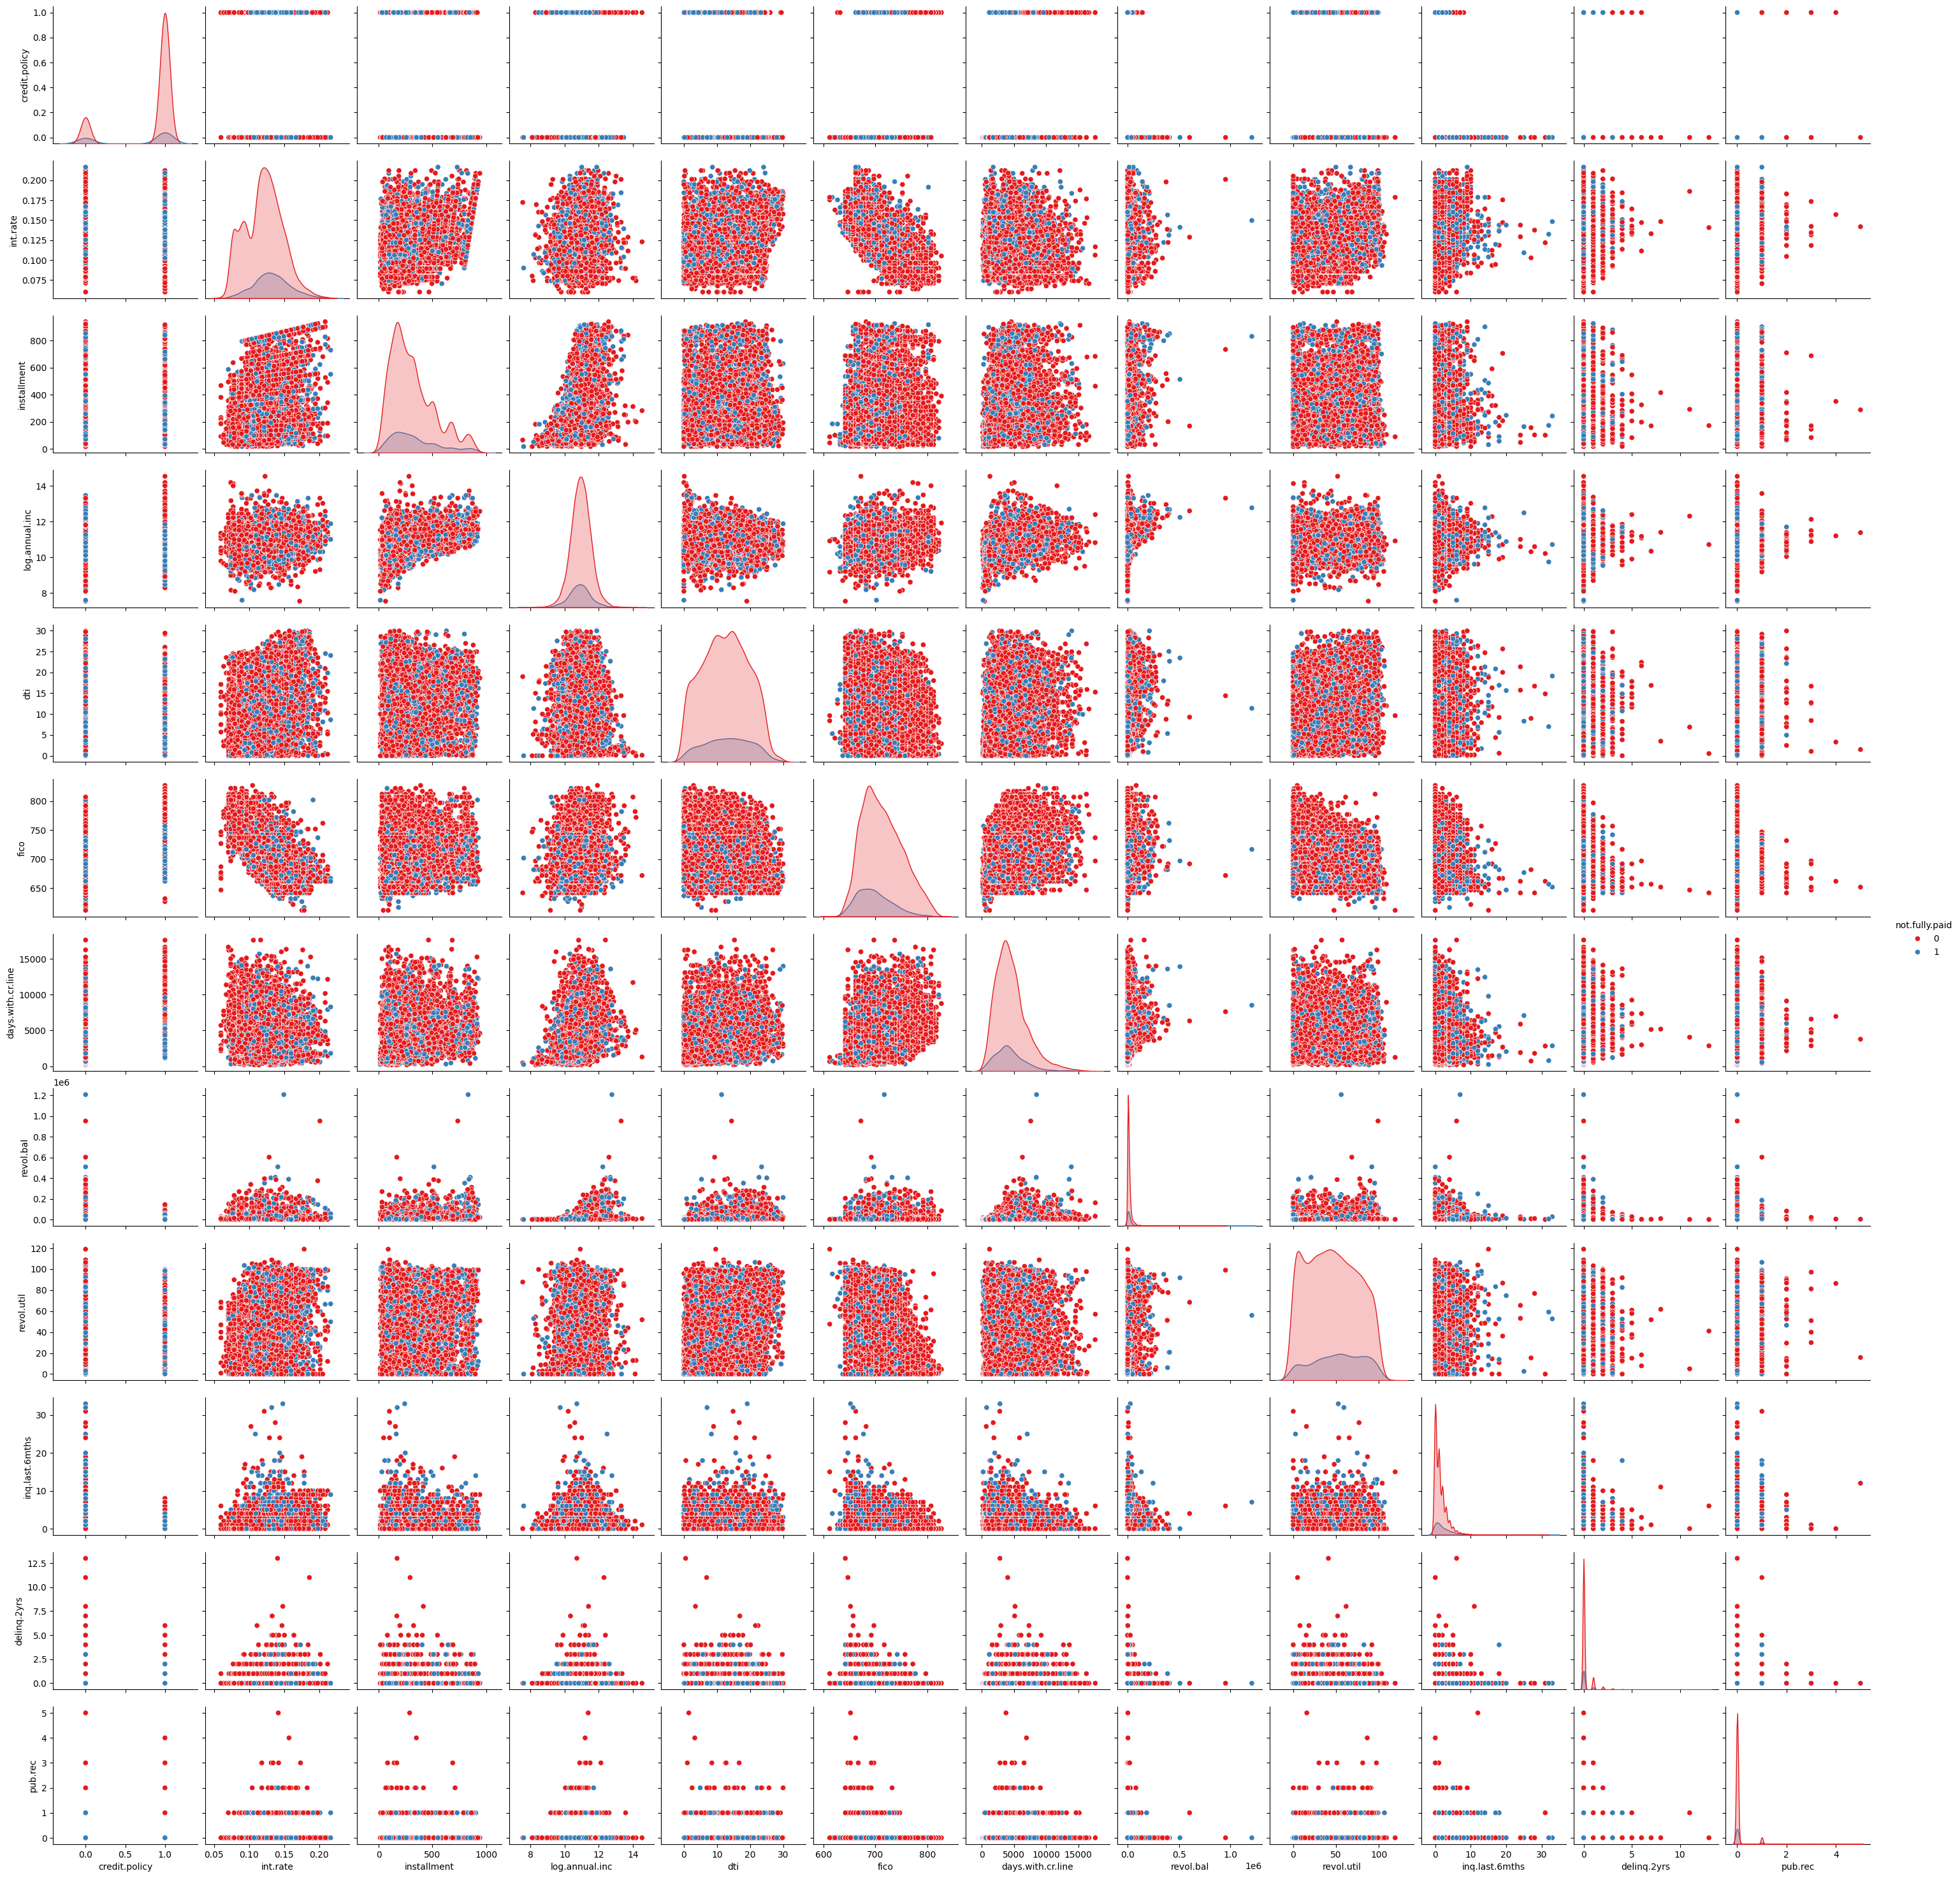

In [17]:
sns.pairplot(df.drop(columns=['purpose']), hue='not.fully.paid', palette='Set1')
plt.show()

In [3]:
X = df.drop(['not.fully.paid', 'purpose'], axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2395   13]
 [ 452   14]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.52      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874



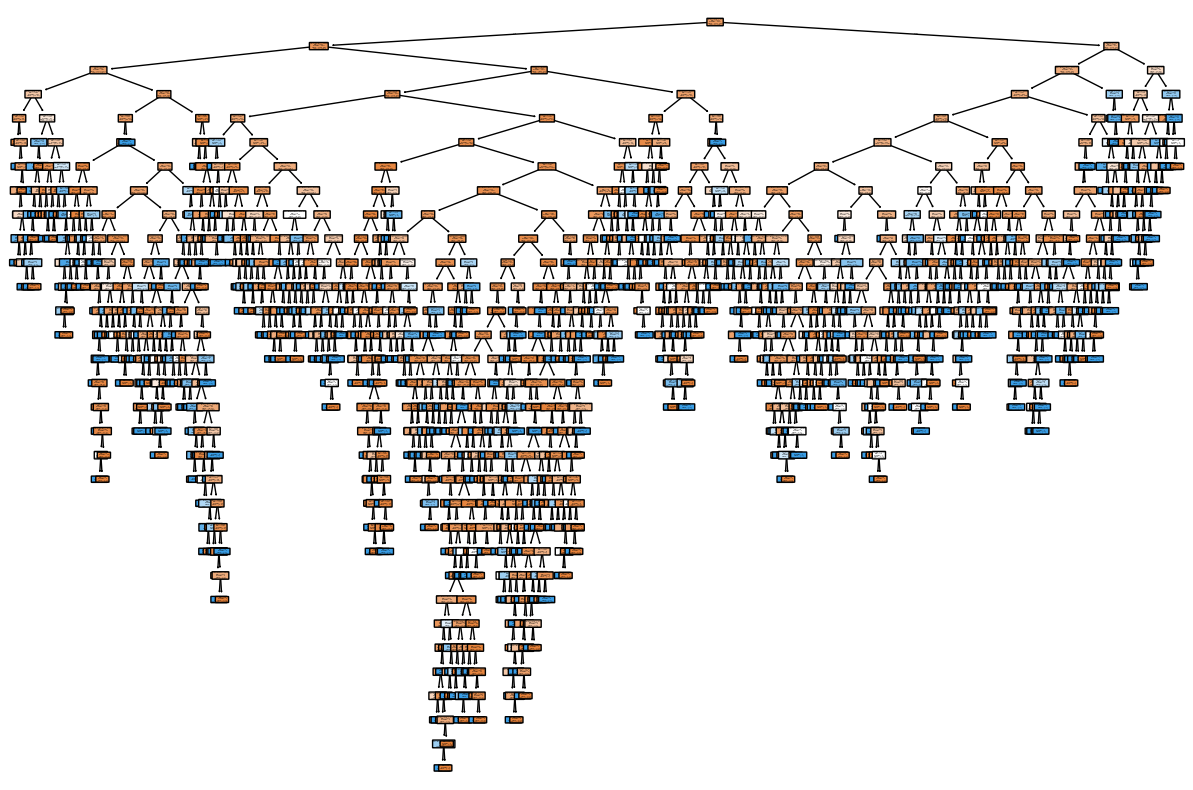

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0], filled=True, feature_names=X.columns, class_names=['Fully Paid', 'Not Fully Paid'], rounded=True)
plt.show()

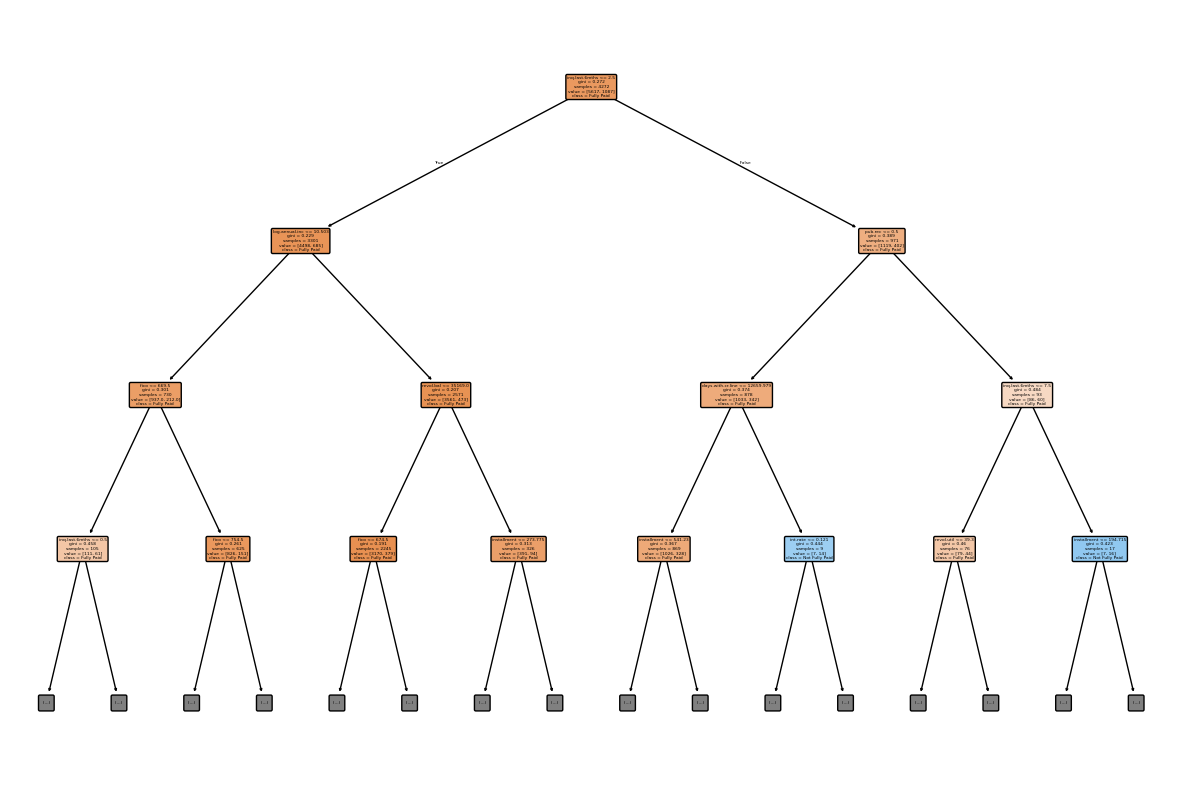

In [29]:
plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0], filled=True, feature_names=X.columns, class_names=['Fully Paid', 'Not Fully Paid'], rounded=True, max_depth=3)
plt.show()